In [134]:
import torch
import pickle
import numpy as np
import matplotlib.pyplot as plt

results_44 = pickle.load(open('epoch_44_total_results.pkl','rb'))
results_61 = pickle.load(open('epoch_61_total_results.pkl','rb'))

In [234]:
train_preds_44 = results_44['train_predictions']
test_preds_44 = results_44['test_predictions']
train_times_44 = results_44['train_times']
test_times_44 = results_44['test_times']

train_preds_61 = results_61['train_predictions']
test_preds_61 = results_61['test_predictions']
train_times_61 = results_61['train_times']
test_times_61 = results_61['test_times']

vid_names = results_61['test_fullpaths']

In [176]:
def plot_one(pred_array, title='', crashtime=None):
    times = np.arange(len(pred_array))*0.1+0.9
    plt.ylim(-0.2,1.2)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.plot(times, pred_array)
    plt.plot(times, np.zeros(len(pred_array)))
    plt.plot(times, np.ones(len(pred_array)))
    if crashtime is not None and crashtime > 0:
        plt.vlines(crashtime, -1, 2)
    plt.show()

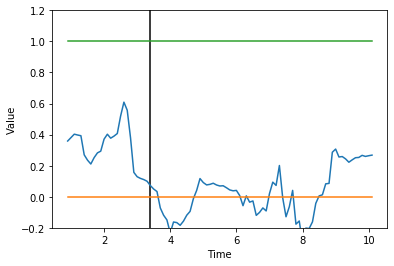

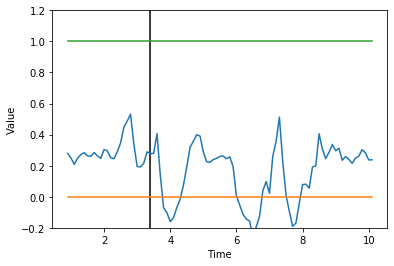

In [225]:
ind = 13
plot_one(test_preds_44[ind].cpu().numpy(), crashtime=test_times_44[ind])
plot_one(test_preds_61[ind].cpu().numpy(), crashtime=test_times_61[ind])

In [230]:
def plot_several(array, times, name, number, inc=5):
    title_prefix = name+'_epoch_'+str(number)+'_vid_'
    for i in range(0,len(array),inc):
        plot_one(array[i].cpu().numpy(), title=title_prefix+str(i), crashtime=times[i])

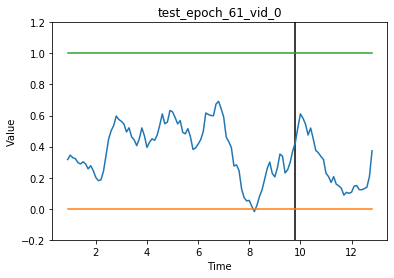

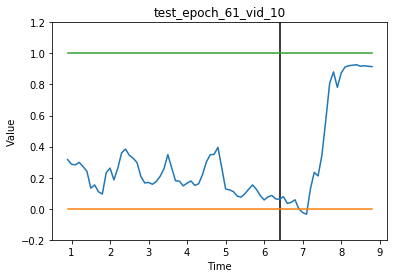

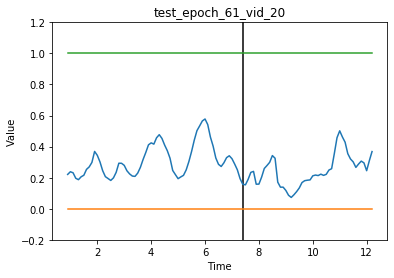

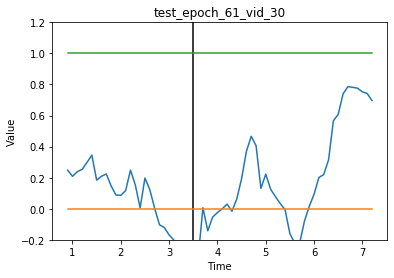

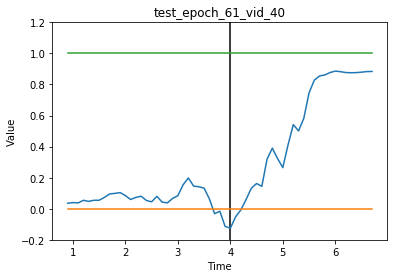

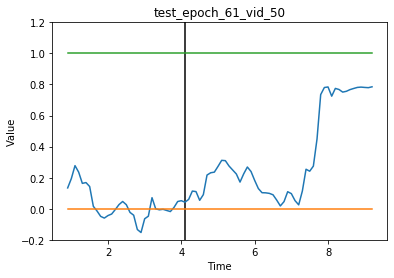

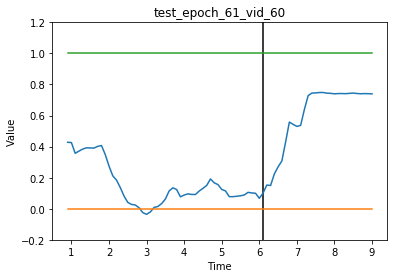

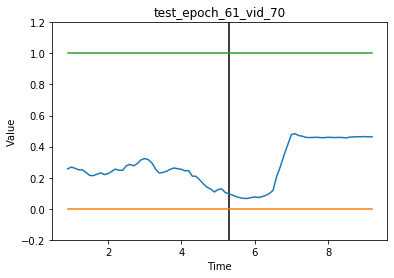

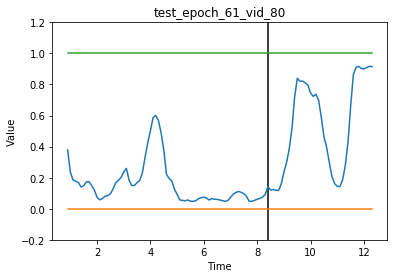

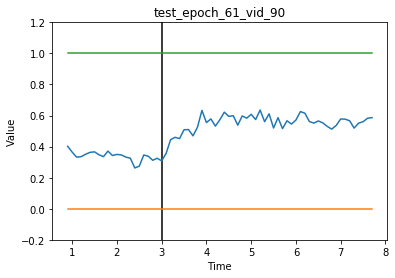

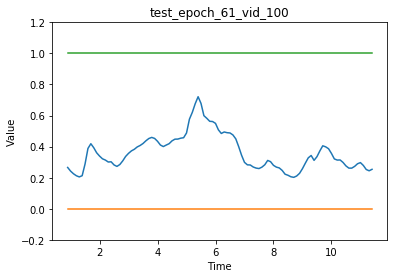

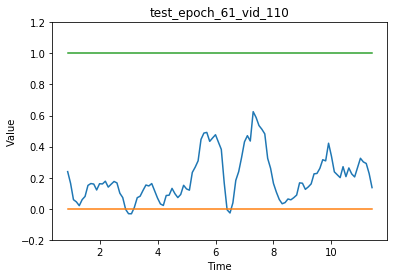

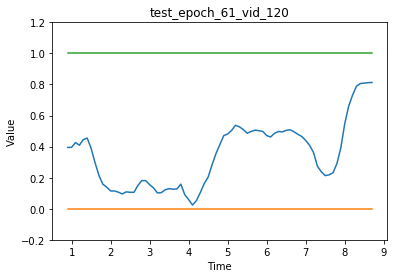

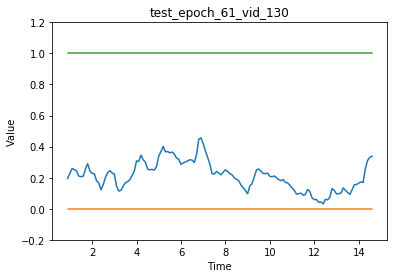

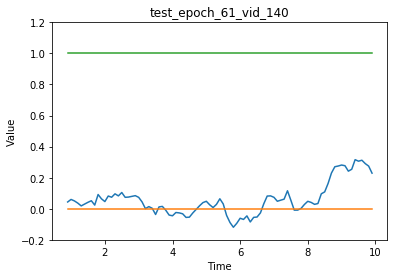

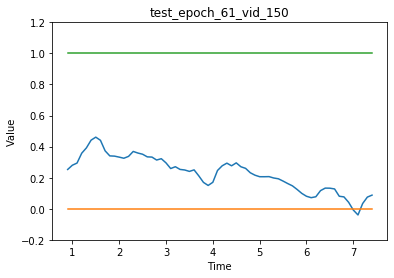

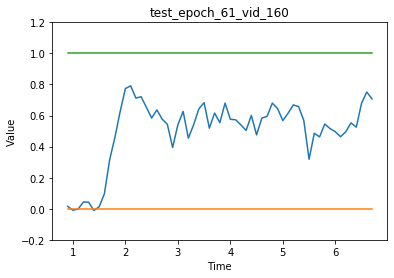

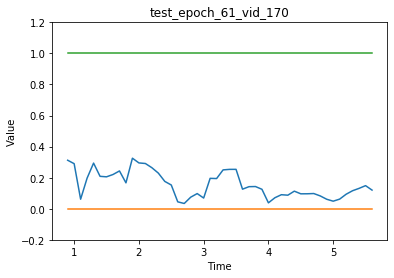

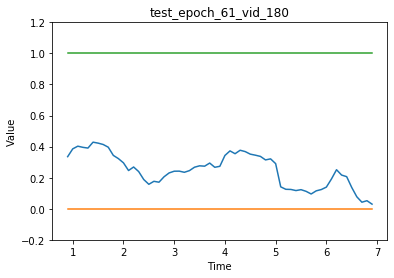

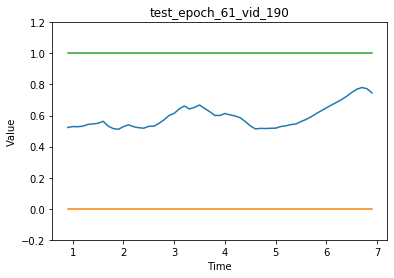

In [233]:
plot_several(test_preds_61, test_times_61, 'test', 61, inc=10)

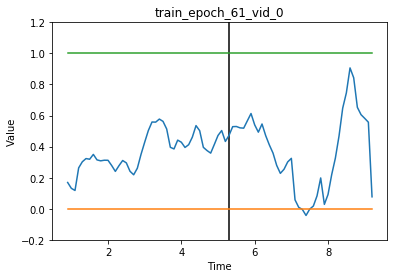

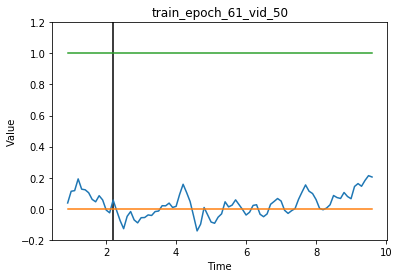

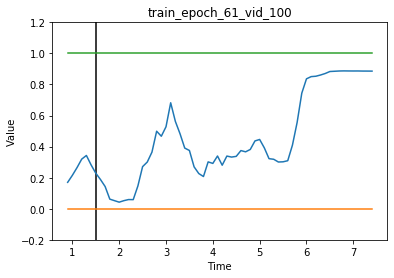

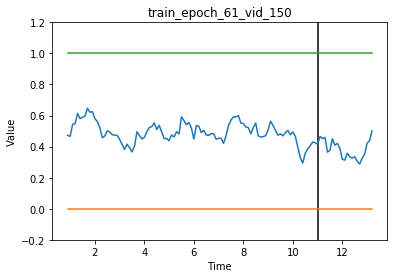

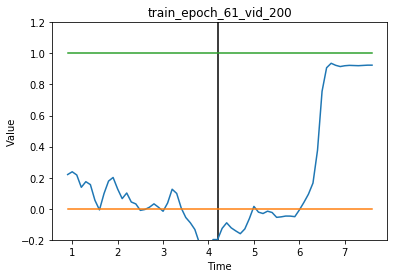

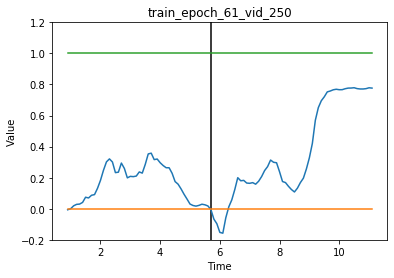

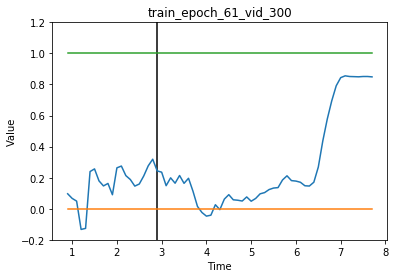

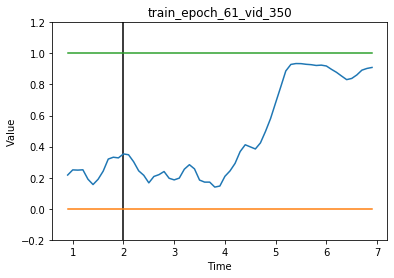

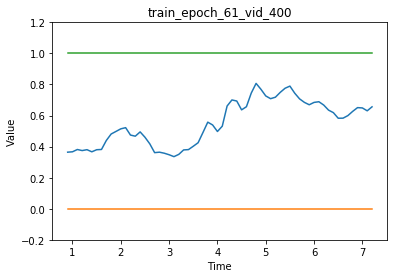

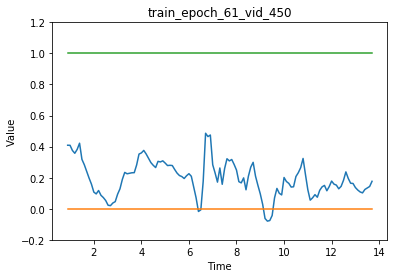

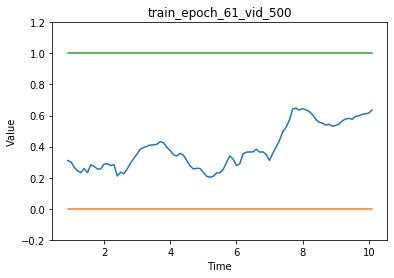

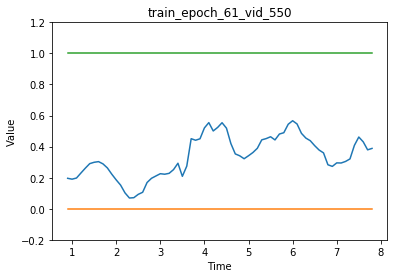

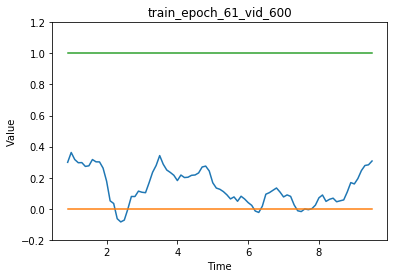

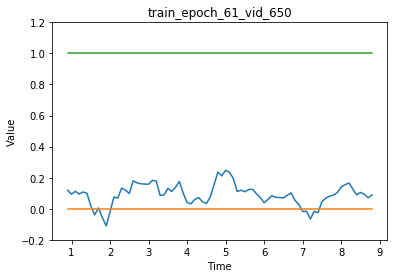

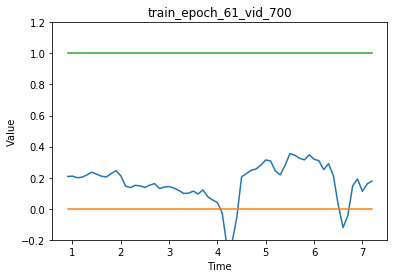

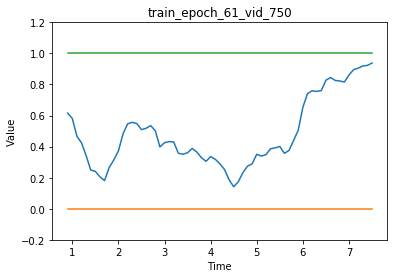

In [232]:
plot_several(train_preds_61, train_times_61, 'train', 61, inc=50)

In [246]:
vid_names[50]

'/mnt/linuxshared/data/BeamNG/positive/pos_255.mp4'